## Introduction

Logging into Kaggle for the first time can be daunting. Our competitions often have large cash prizes, public leaderboards, and involve complex data. Nevertheless, we really think all data scientists can rapidly learn from machine learning competitions and meaningfully contribute to our community. To give you a clear understanding of how our platform works and a mental model of the type of learning you could do on Kaggle, we've created a Getting Started tutorial for the Titanic competition. It walks you through the initial steps required to get your first decent submission on the leaderboard. By the end of the tutorial, you'll also have a solid understanding of how to use Kaggle's online coding environment, where you'll have trained your own machine learning model.

So if this is your first time entering a Kaggle competition, regardless of whether you:

have experience with handling large datasets,
haven't done much coding,
are newer to data science, or
are relatively experienced (but are just unfamiliar with Kaggle's platform),
you're in the right place!

## Part 1: Get started

In this section, you'll learn more about the competition and make your first submission.

### Join the competition!
The first thing to do is to join the competition! Open a new window with the competition page, and click on the "Join Competition" button, if you haven't already. (If you see a "Submit Predictions" button instead of a "Join Competition" button, you have already joined the competition, and don't need to do so again.)

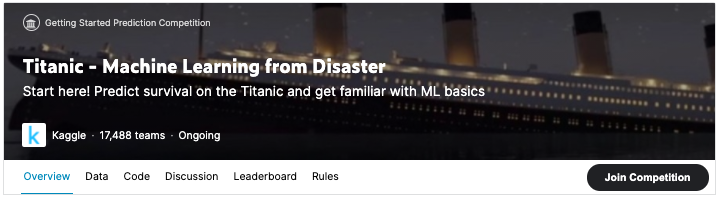

This takes you to the rules acceptance page. You must accept the competition rules in order to participate. These rules govern how many submissions you can make per day, the maximum team size, and other competition-specific details. Then, click on "I Understand and Accept" to indicate that you will abide by the competition rules.

### The challenge
The competition is simple: we want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

### The data
To take a look at the competition data, click on the Data tab at the top of the competition page. Then, scroll down to find the list of files.
There are three files in the data: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.

### (1) train.csv
train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.

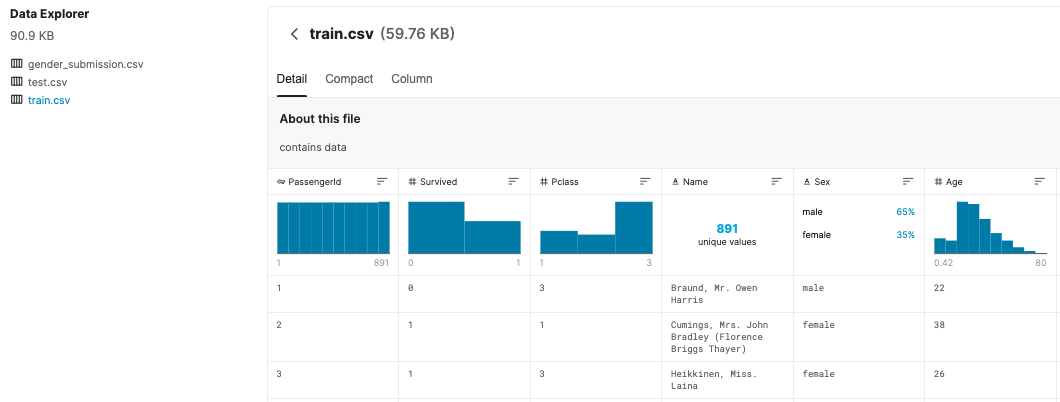

The values in the second column ("Survived") can be used to determine whether each passenger survived or not:

    
    if it's a "1", the passenger survived.

    if it's a "0", the passenger died.
    
   For instance, the first passenger listed in train.csv is Mr. Owen Harris Braund. He was 22 years old when he died on the Titanic.

### (2) test.csv
Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived.

Click on test.csv (on the left of the screen) to examine its contents. Note that test.csv does not have a "Survived" column - this information is hidden from you, and how well you do at predicting these hidden values will determine how highly you score in the competition!

### (3) gender_submission.csv
The gender_submission.csv file is provided as an example that shows how you should structure your predictions. It predicts that all female passengers survived, and all male passengers died. Your hypotheses regarding survival will probably be different, which will lead to a different submission file. But, just like this file, your submission should have:

    a "PassengerId" column containing the IDs of each passenger from test.csv.
    
    a "Survived" column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

## Part 2: Your coding environment

In this section, you'll train your own machine learning model to improve your predictions. If you've never written code before or don't have any experience with machine learning, don't worry! We don't assume any prior experience in this tutorial.

### The Notebook
The first thing to do is to create a Kaggle Notebook where you'll store all of your code. You can use Kaggle Notebooks to getting up and running with writing code quickly, and without having to install anything on your computer. (If you are interested in deep learning, we also offer free GPU access!)

Begin by clicking on the Code tab on the competition page. Then, click on "New Notebook".
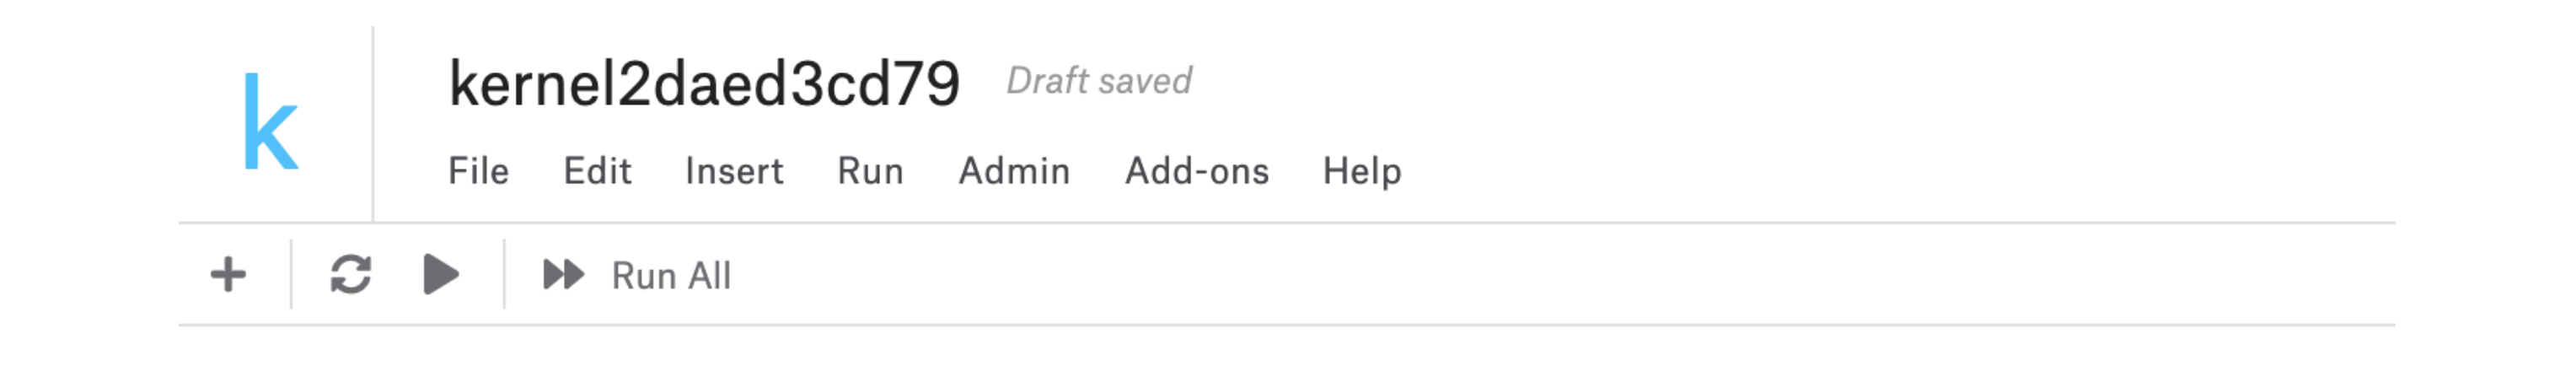
You can edit the name by clicking on it. Change it to something more descriptive, like "Getting Started with Titanic".
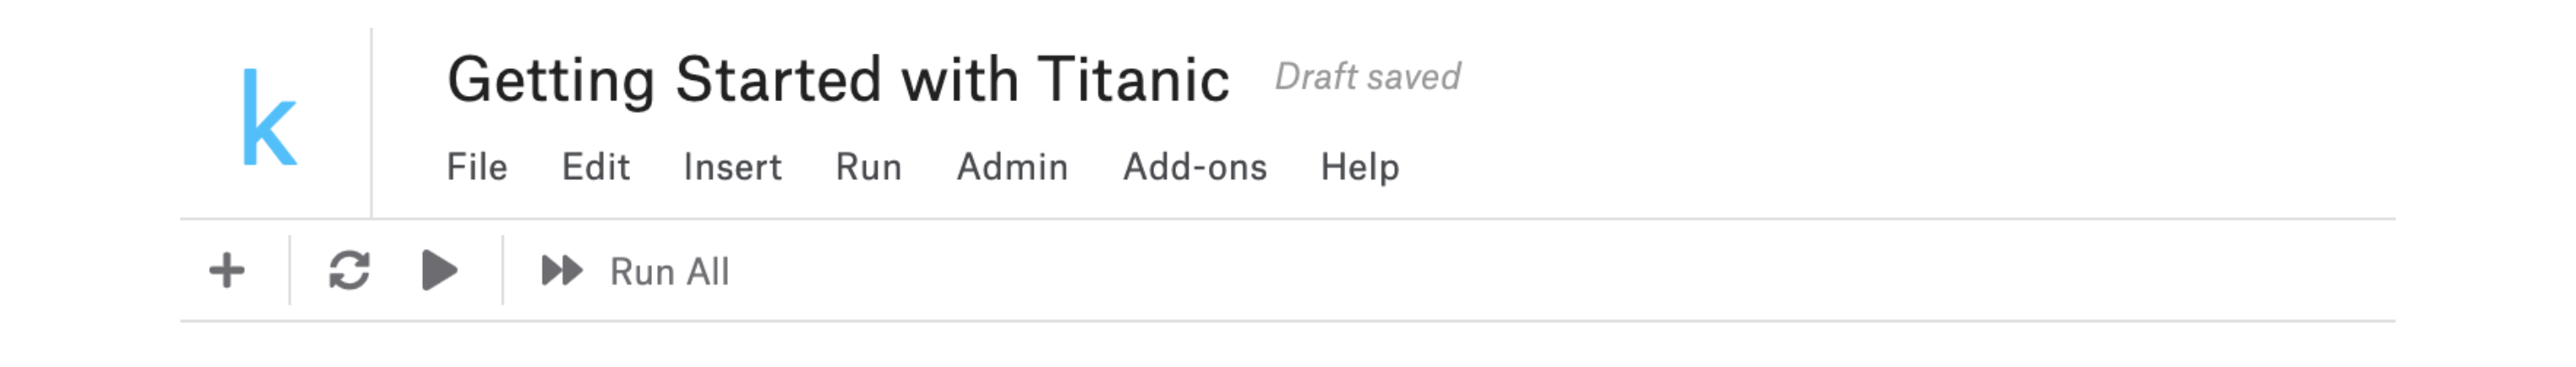

### Your first lines of code
When you start a new notebook, it has two gray boxes for storing code. We refer to these gray boxes as "code cells".

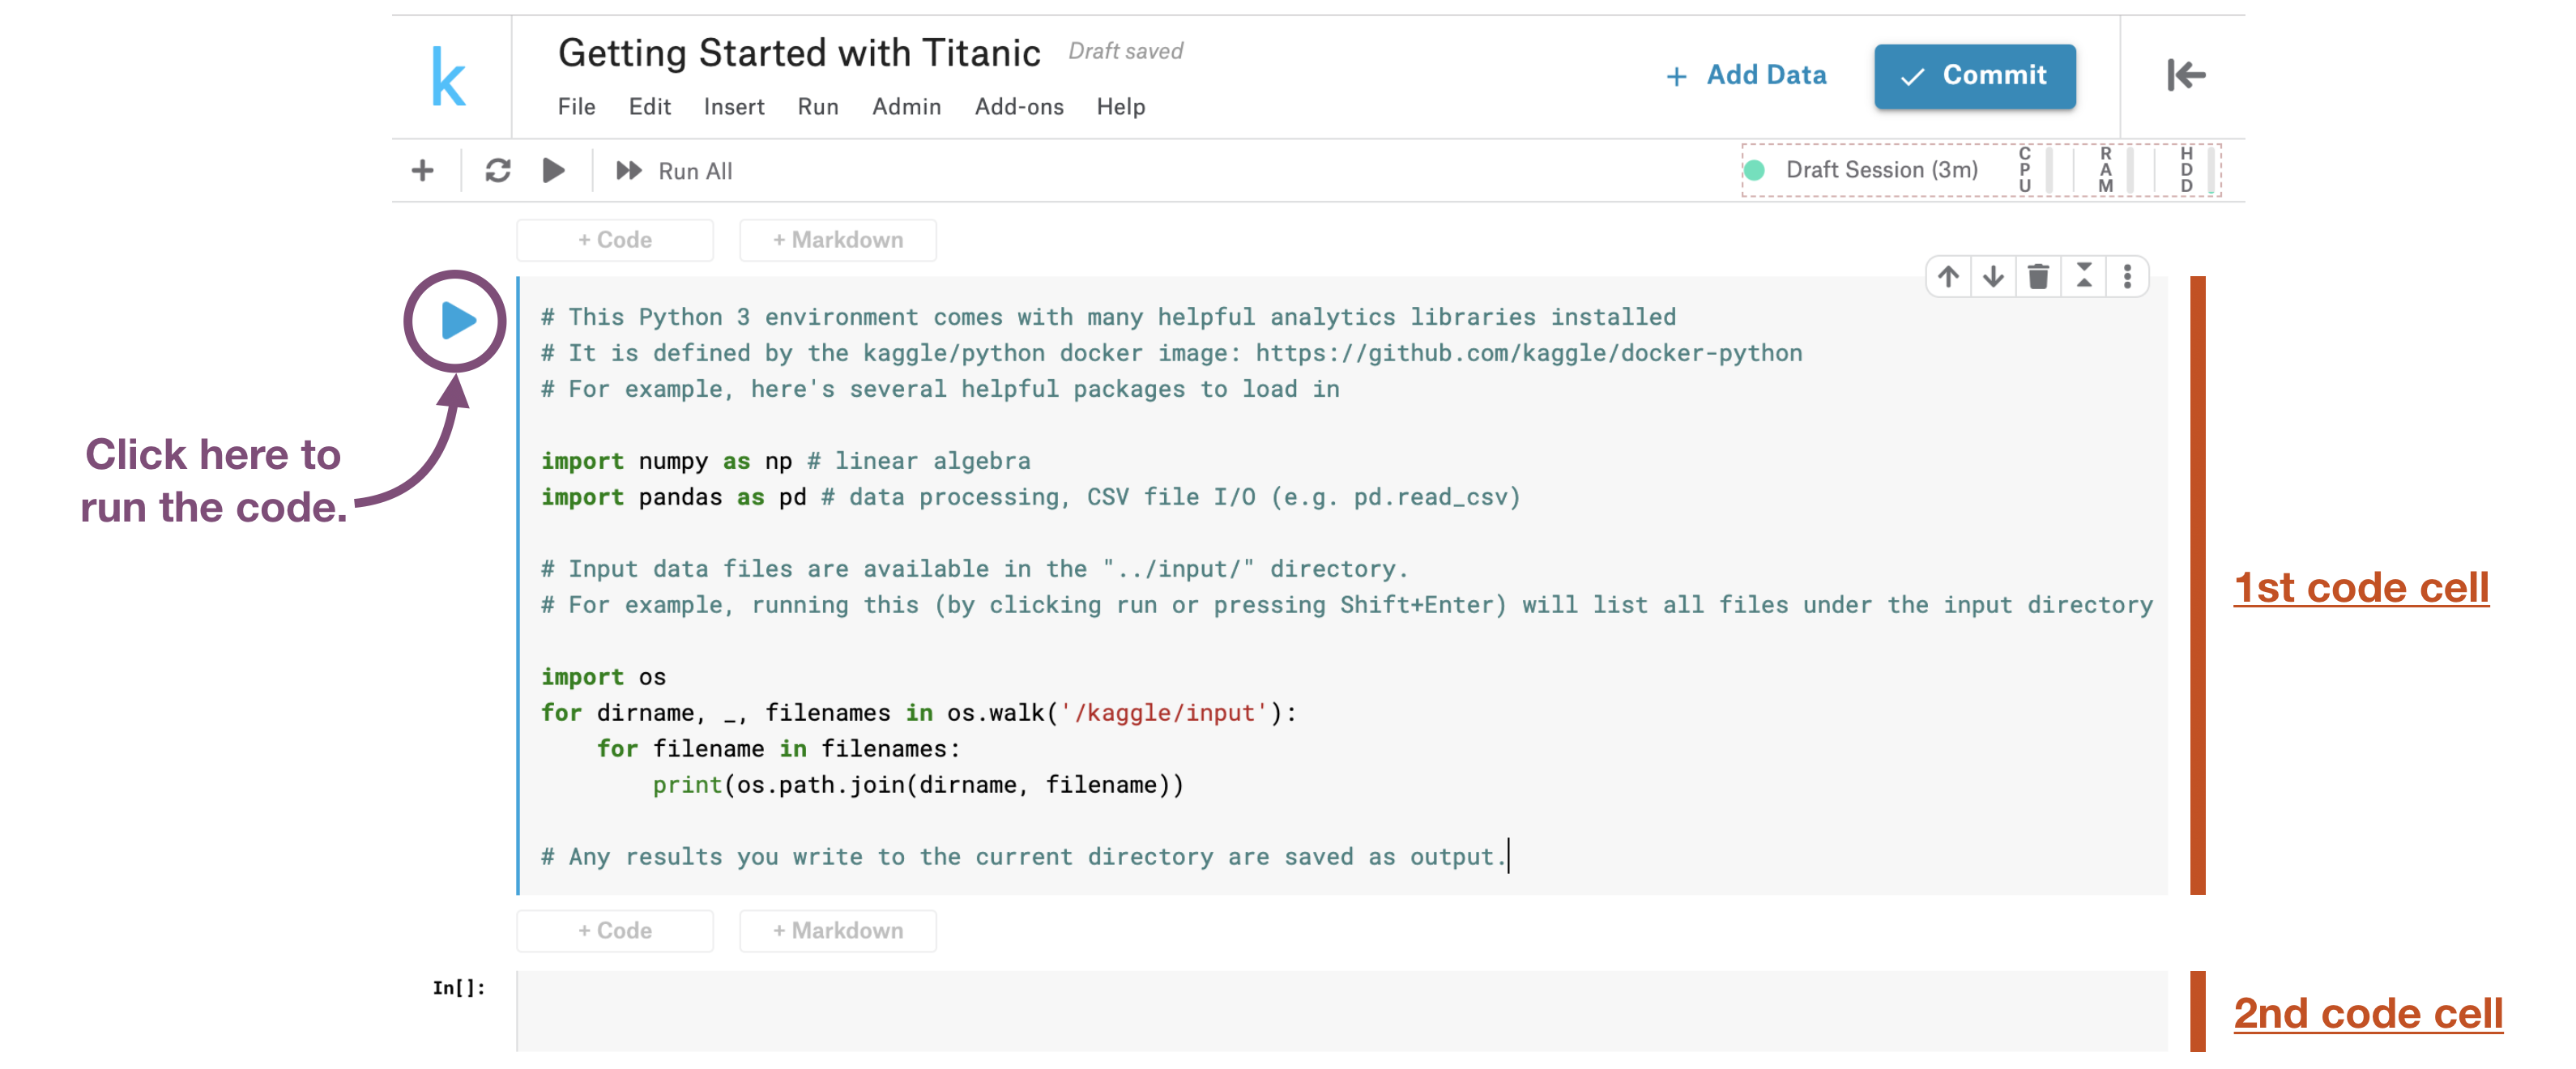

The first code cell already has some code in it. To run this code, put your cursor in the code cell. (If your cursor is in the right place, you'll notice a blue vertical line to the left of the gray box.) Then, either hit the play button (which appears to the left of the blue line), or hit [Shift] + [Enter] on your keyboard.

If the code runs successfully, three lines of output are returned. Below, you can see the same code that you just ran, along with the output that you should see in your notebook.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

This shows us where the competition data is stored, so that we can load the files into the notebook. We'll do that next.

### Load the data
The second code cell in your notebook now appears below the three lines of output with the file locations.

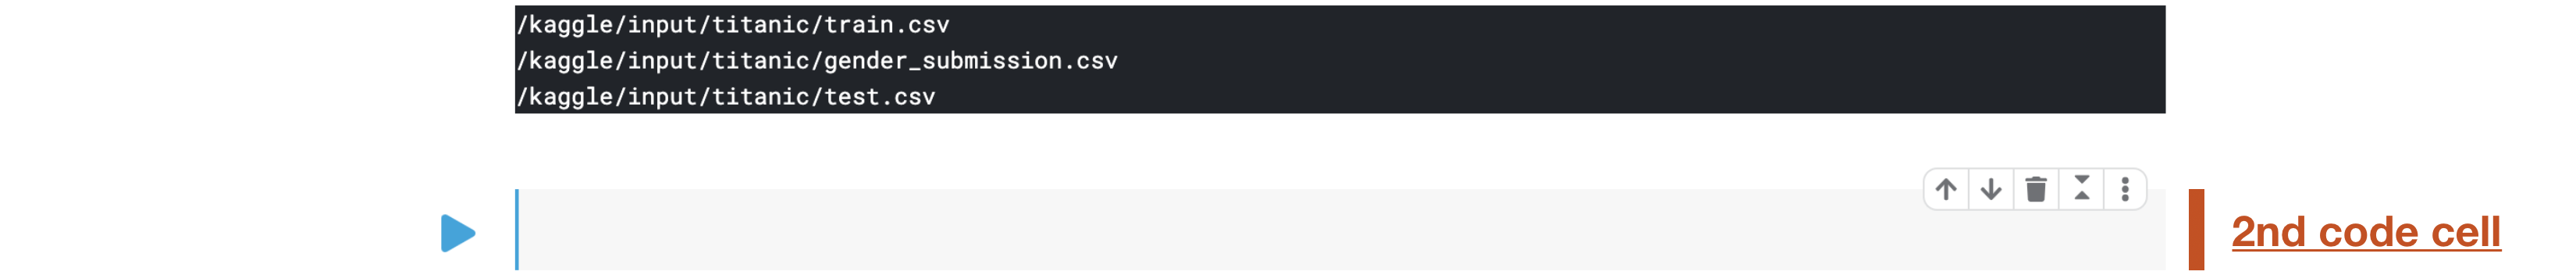

Type the two lines of code below into your second code cell. Then, once you're done, either click on the blue play button, or hit [Shift] + [Enter].

In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

Your code should return the output above, which corresponds to the first five rows of the table in train.csv. It's very important that you see this output in your notebook before proceeding with the tutorial!

    If your code does not produce this output, double-check that your code is identical to the two lines above. And, make sure your cursor is in the code cell before hitting [Shift] + [Enter].

The code that you've just written is in the Python programming language. It uses a Python "module" called pandas (abbreviated as pd) to load the table from the train.csv file into the notebook. To do this, we needed to plug in the location of the file (which we saw was /kaggle/input/titanic/train.csv).

    If you're not already familiar with Python (and pandas), the code shouldn't make sense to you -- but don't worry! The point of this tutorial is to (quickly!) make your first submission to the competition. At the end of the tutorial, we suggest resources to continue your learning.

At this point, you should have at least three code cells in your notebook.

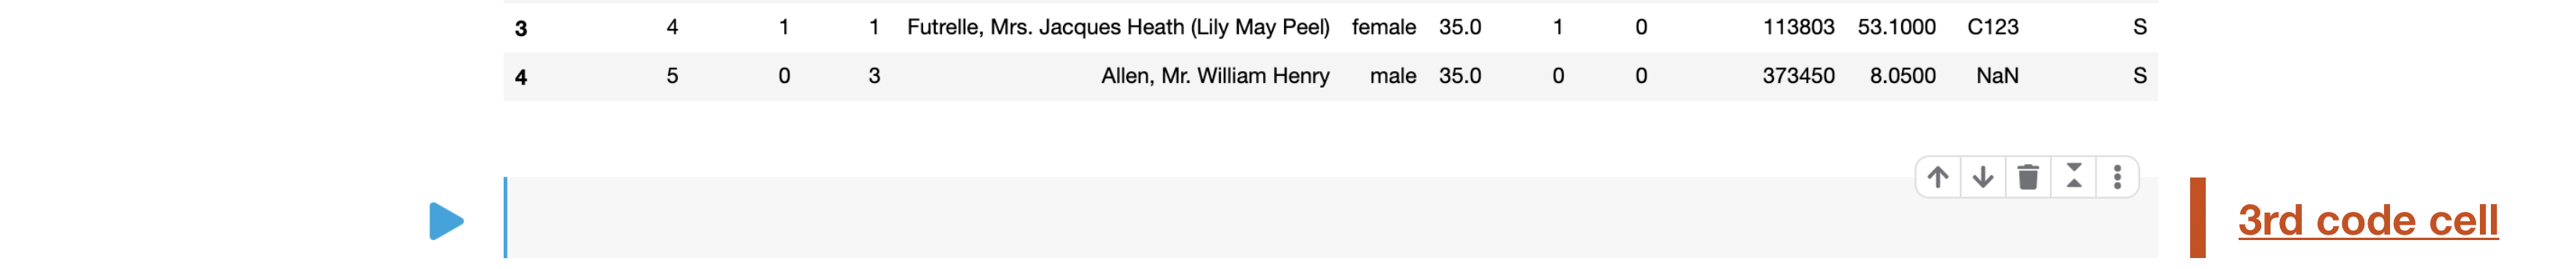

Copy the code below into the third code cell of your notebook to load the contents of the test.csv file. Don't forget to click on the play button (or hit [Shift] + [Enter])!

In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

As before, make sure that you see the output above in your notebook before continuing.

Once all of the code runs successfully, all of the data (in train.csv and test.csv) is loaded in the notebook. (The code above shows only the first 5 rows of each table, but all of the data is there -- all 891 rows of train.csv and all 418 rows of test.csv!)

## Part 3: Your first submission

Remember our goal: we want to find patterns in train.csv that help us predict whether the passengers in test.csv survived.

It might initially feel overwhelming to look for patterns, when there's so much data to sort through. So, we'll start simple.

### Explore a pattern

Remember that the sample submission file in gender_submission.csv assumes that all female passengers survived (and all male passengers died).

Is this a reasonable first guess? We'll check if this pattern holds true in the data (in train.csv).

Copy the code below into a new code cell. Then, run the cell.

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

Before moving on, make sure that your code returns the output above. The code above calculates the percentage of female passengers (in train.csv) who survived.

Then, run the code below in another code cell:

In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

The code above calculates the percentage of male passengers (in train.csv) who survived.

From this you can see that almost 75% of the women on board survived, whereas only 19% of the men lived to tell about it. Since gender seems to be such a strong indicator of survival, the submission file in gender_submission.csv is not a bad first guess!

But at the end of the day, this gender-based submission bases its predictions on only a single column. As you can imagine, by considering multiple columns, we can discover more complex patterns that can potentially yield better-informed predictions. Since it is quite difficult to consider several columns at once (or, it would take a long time to consider all possible patterns in many different columns simultaneously), we'll use machine learning to automate this for us.

### Your first machine learning model

We'll build what's known as a **random forest model**. This model is constructed of several "trees" (there are three trees in the picture below, but we'll construct 100!) that will individually consider each passenger's data and vote on whether the individual survived. Then, the random forest model makes a democratic decision: the outcome with the most votes wins!

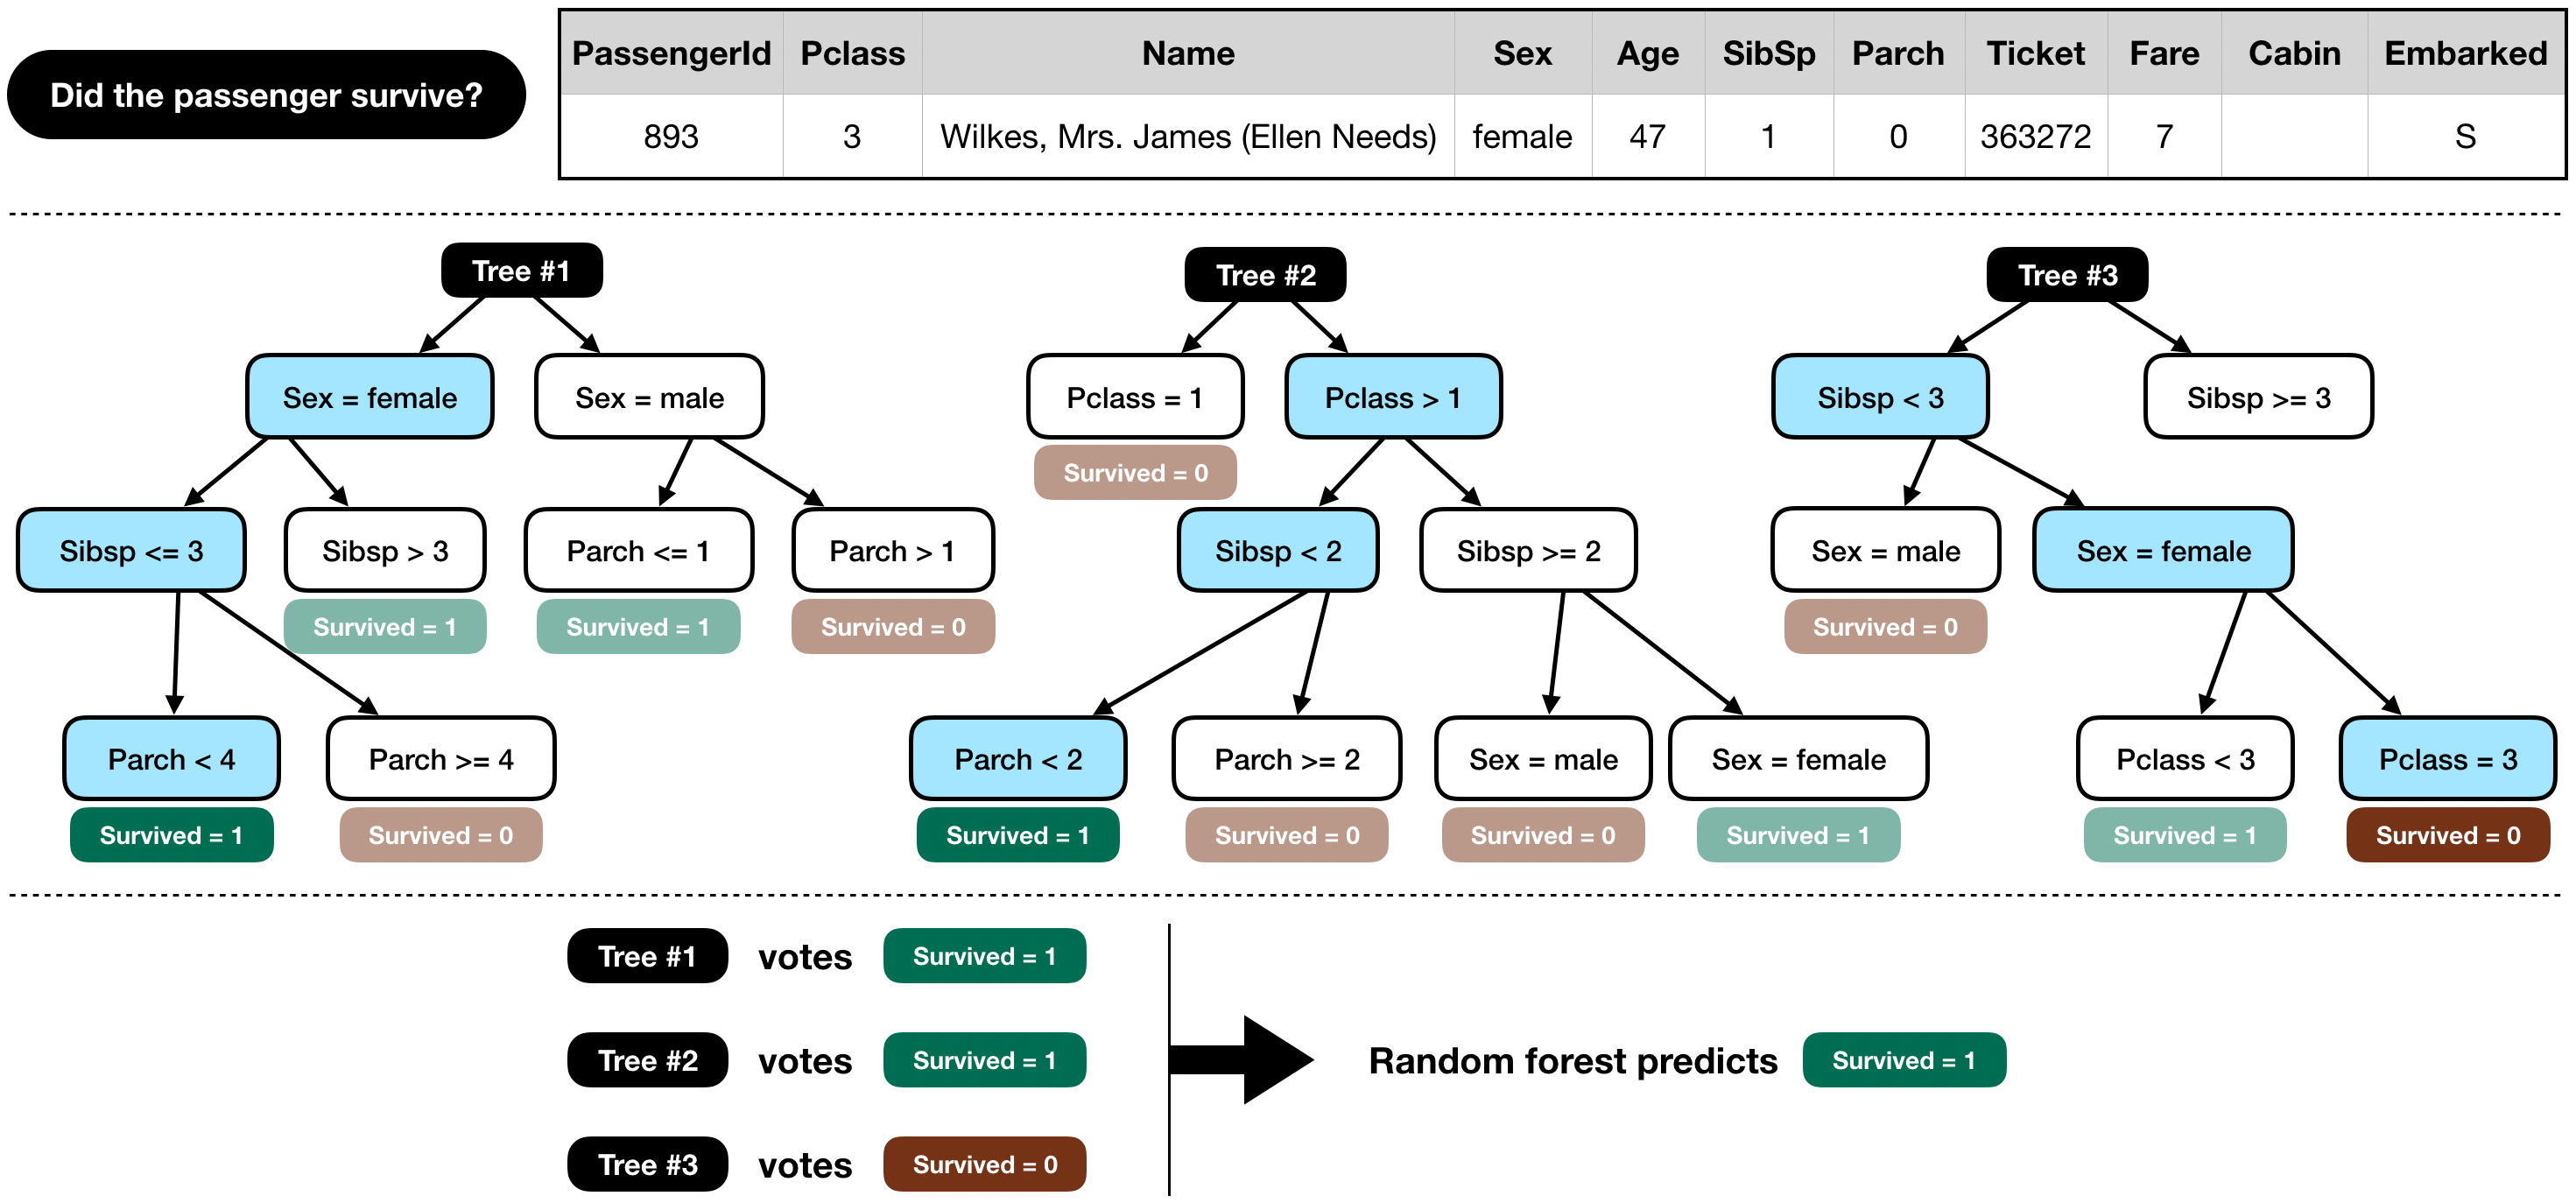

The code cell below looks for patterns in four different columns ("Pclass", "Sex", "SibSp", and "Parch") of the data. It constructs the trees in the random forest model based on patterns in the train.csv file, before generating predictions for the passengers in test.csv. The code also saves these new predictions in a CSV file my_submission.csv.

Copy this code into your notebook, and run it in a new code cell.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Make sure that your notebook outputs the same message above (Your submission was successfully saved!) before moving on.

    Again, don't worry if this code doesn't make sense to you! For now, we'll focus on how to generate and submit predictions.

Once you're ready, click on the "Save Version" button in the top right corner of your notebook. This will generate a pop-up window.

    Ensure that the "Save and Run All" option is selected, and then click on the "Save" button.

    This generates a window in the bottom left corner of the notebook. After it has finished running, click on the number to the right of the "Save Version" button. This pulls up a list of versions on the right of the screen. Click on the ellipsis (...) to the right of the most recent version, and select Open in Viewer.

    Click on the Output tab on the right of the screen. Then, click on the "Submit to Competition" button to submit your results.